### Performance Comparison

In [2]:
# General rule in finance/investing: Higher risk must be rewarded with higher returns.
# Which instrument(s) performed best/worst in the past in terms of risk & return?

In [3]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [4]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates=["Date"])
close

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,
2014-01-01,433.5000,1076.6500,202.0000,207.2626
2014-01-02,435.0688,1083.5000,199.8500,207.3563
2014-01-03,445.6437,1111.1000,199.1500,208.7251
2014-01-06,439.7375,1119.8000,198.9500,209.2500
2014-01-07,432.1437,1103.0750,194.5000,206.3251
...,...,...,...,...
2024-01-31,1660.9000,3815.9500,273.8500,478.1500
2024-02-01,1657.0500,3854.1499,268.5000,471.3500
2024-02-02,1693.3500,3966.3000,272.5500,483.1500


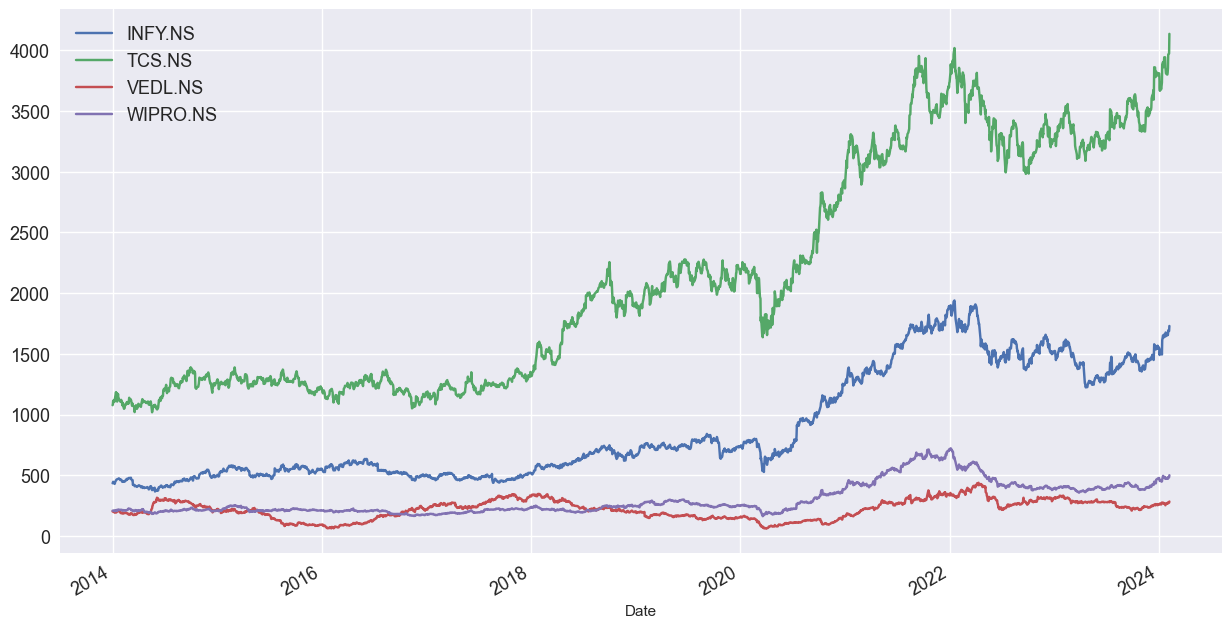

In [5]:
close.dropna().plot(figsize = (15,8), fontsize=13)
plt.legend(fontsize = 13)
plt.show()

In [6]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2491 entries, 2014-01-01 to 2024-02-06
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INFY.NS   2491 non-null   float64
 1   TCS.NS    2491 non-null   float64
 2   VEDL.NS   2491 non-null   float64
 3   WIPRO.NS  2491 non-null   float64
dtypes: float64(4)
memory usage: 97.3 KB


In [7]:
# close
close.shift()

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,
2014-01-01,NaN,NaN,NaN,NaN
2014-01-02,433.5000,1076.6500,202.0000,207.2626
2014-01-03,435.0688,1083.5000,199.8500,207.3563
2014-01-06,445.6437,1111.1000,199.1500,208.7251
2014-01-07,439.7375,1119.8000,198.9500,209.2500
...,...,...,...,...
2024-01-31,1651.4500,3800.5500,266.2500,472.5000
2024-02-01,1660.9000,3815.9500,273.8500,478.1500
2024-02-02,1657.0500,3854.1499,268.5000,471.3500


In [8]:
# np.log(close / close.shift()).info() #keen NaN
a =  np.log(close / close.shift()).info() #keen NaN
a

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2491 entries, 2014-01-01 to 2024-02-06
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INFY.NS   2490 non-null   float64
 1   TCS.NS    2490 non-null   float64
 2   VEDL.NS   2490 non-null   float64
 3   WIPRO.NS  2490 non-null   float64
dtypes: float64(4)
memory usage: 97.3 KB


In [9]:
# b = np.log(close.dropna() / close.dropna().shift())
# b

In [10]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() #remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2491 entries, 2014-01-01 to 2024-02-06
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INFY.NS   2490 non-null   float64
 1   TCS.NS    2490 non-null   float64
 2   VEDL.NS   2490 non-null   float64
 3   WIPRO.NS  2490 non-null   float64
dtypes: float64(4)
memory usage: 97.3 KB


In [11]:
returns = close.apply(lambda x:np.log(x.dropna() / x.dropna().shift()))
returns

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,
2014-01-01,NaN,NaN,NaN,NaN
2014-01-02,0.0036,0.0063,-0.0107,0.0005
2014-01-03,0.0240,0.0252,-0.0035,0.0066
2014-01-06,-0.0133,0.0078,-0.0010,0.0025
2014-01-07,-0.0174,-0.0150,-0.0226,-0.0141
...,...,...,...,...
2024-01-31,0.0057,0.0040,0.0281,0.0119
2024-02-01,-0.0023,0.0100,-0.0197,-0.0143
2024-02-02,0.0217,0.0287,0.0150,0.0247


In [12]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2491 entries, 2014-01-01 to 2024-02-06
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INFY.NS   2490 non-null   float64
 1   TCS.NS    2490 non-null   float64
 2   VEDL.NS   2490 non-null   float64
 3   WIPRO.NS  2490 non-null   float64
dtypes: float64(4)
memory usage: 97.3 KB


In [13]:
returns.describe()

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS
count,2490.0000,2490.0000,2490.0000,2490.0000
mean,0.0006,0.0005,0.0001,0.0004
std,0.0170,0.0152,0.0283,0.0159
min,-0.1766,-0.0988,-0.2286,-0.0937
25%,-0.0081,-0.0073,-0.0136,-0.0079
50%,0.0007,0.0004,0.0004,0.0004
75%,0.0097,0.0086,0.0156,0.0083
max,0.1136,0.0939,0.1704,0.1551


In [14]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
INFY.NS,0.0006,0.0170
TCS.NS,0.0005,0.0152
VEDL.NS,0.0001,0.0283
WIPRO.NS,0.0004,0.0159


In [15]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
INFY.NS,0.0006,0.0170
TCS.NS,0.0005,0.0152
VEDL.NS,0.0001,0.0283
WIPRO.NS,0.0004,0.0159


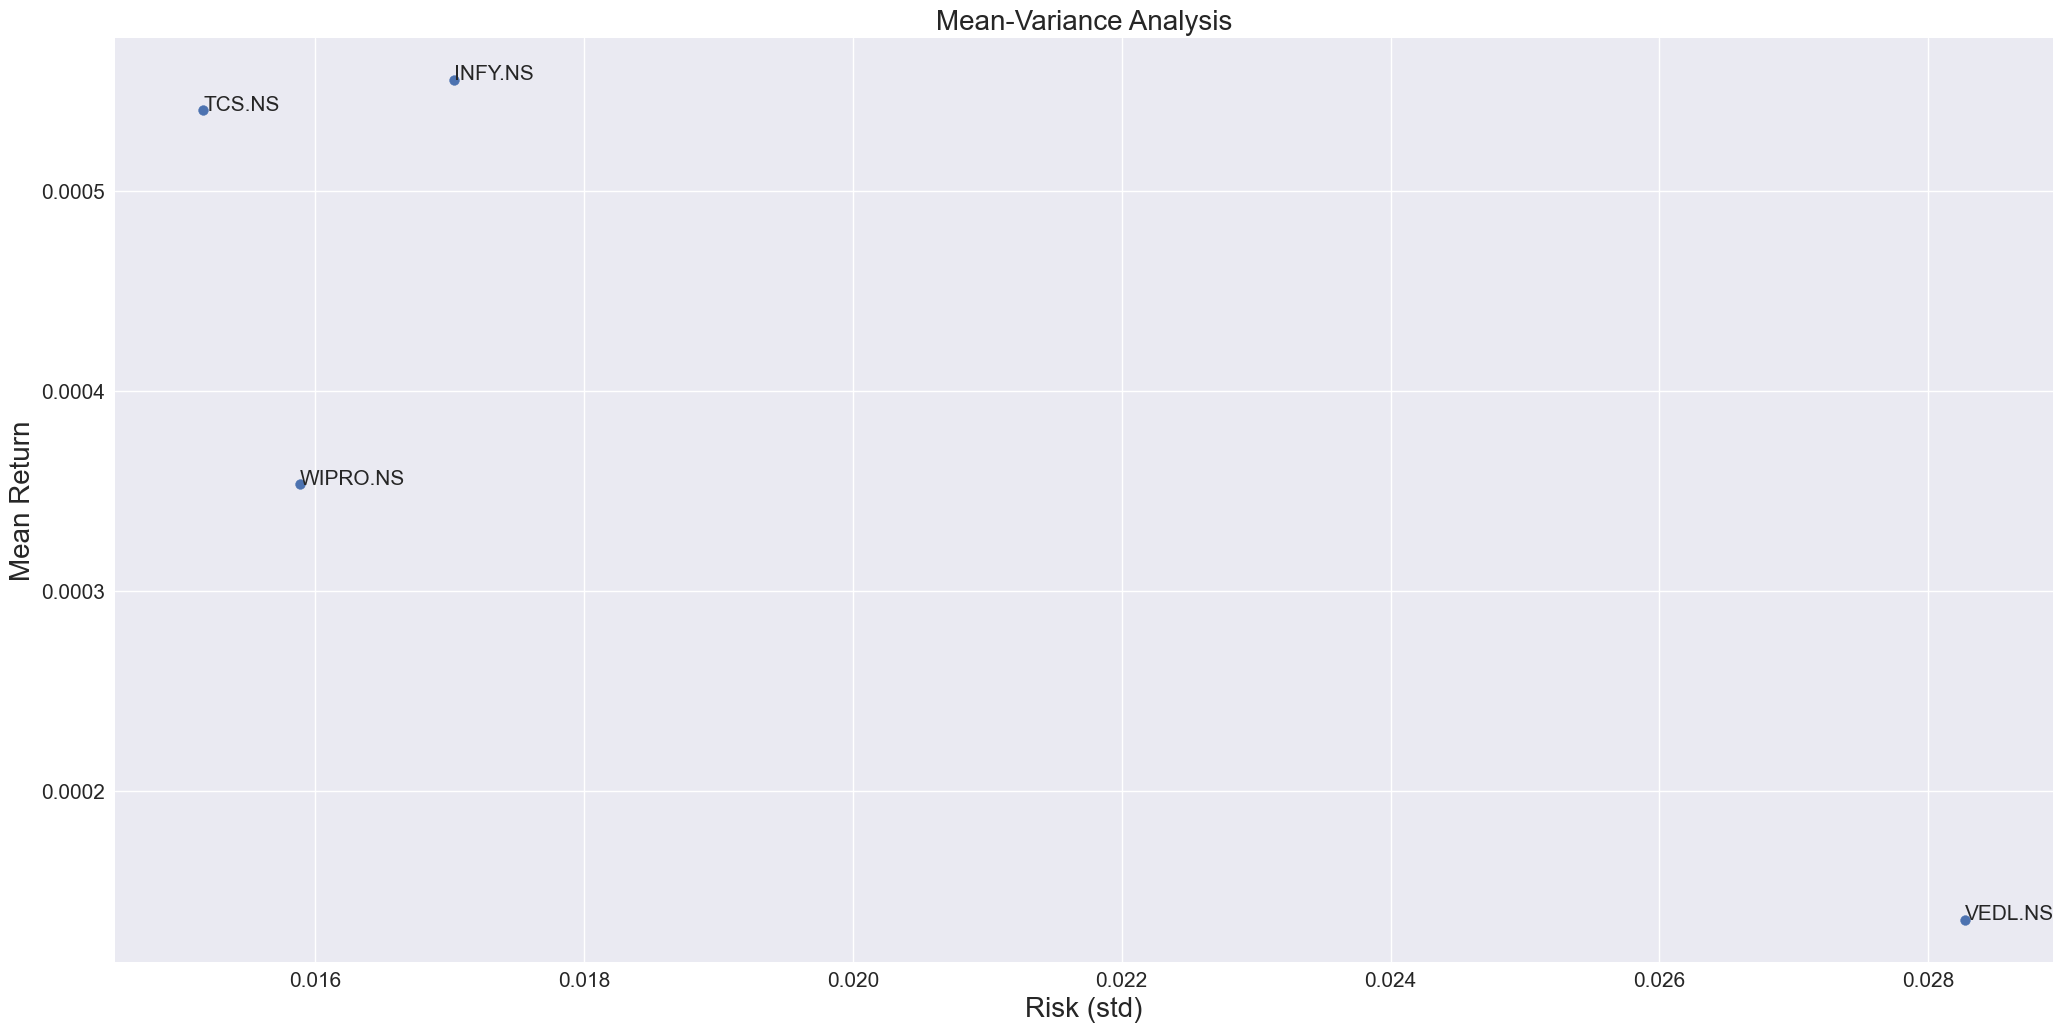

In [18]:
summary.plot(kind = "scatter", x = "Std", y = "Mean",figsize = (25,12), s = 50, fontsize = 15)
for i in summary.index:
     plt.annotate(i, xy=(summary.loc[i, "Std"], summary.loc[i, "Mean"]), size = 15)
#     plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
#     matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, 
#                                arrowprops=None, annotation_clip=None, **kwargs)
plt.xlabel("Risk (std)", fontsize = 20)
plt.ylabel("Mean Return", fontsize = 20)
plt.title("Mean-Variance Analysis", fontsize =20)
plt.show()
# lecture 20

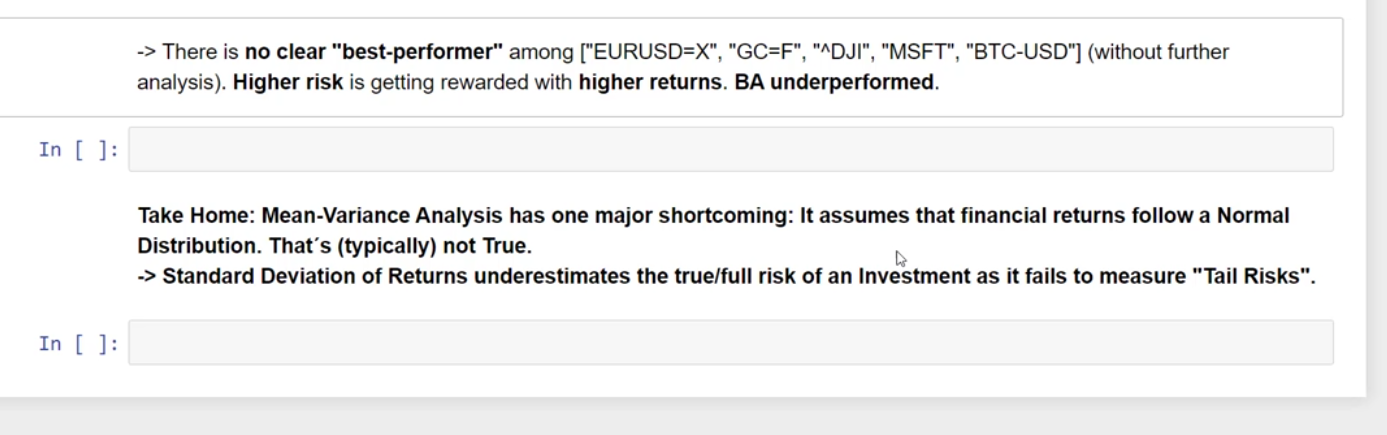